# Explore WOD data

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import gsw

In [5]:
osd_ds = xr.open_mfdataset('/Users/mzahn/data/Labrador_AR7W/ocldb1769457252.646961.OSD/ocldb1769457252.646961.OSD.nc')
ctd_ds = xr.open_mfdataset('/Users/mzahn/data/Labrador_AR7W/ocldb1769457252.646961.CTD/ocldb1769457252.646961.CTD.nc')

In [106]:
ctd_ds

<xarray.Dataset> Size: 36kB
Dimensions:  (casts: 1789)
Dimensions without coordinates: casts
Data variables:
    lat      (casts) float32 7kB dask.array<chunksize=(1789,), meta=np.ndarray>
    lon      (casts) float32 7kB dask.array<chunksize=(1789,), meta=np.ndarray>
    time     (casts) datetime64[ns] 14kB dask.array<chunksize=(1789,), meta=np.ndarray>
    cast     (casts) int32 7kB dask.array<chunksize=(1789,), meta=np.ndarray>

/tmp/ipykernel_14963/1360926972.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='lower left',ncol=2)


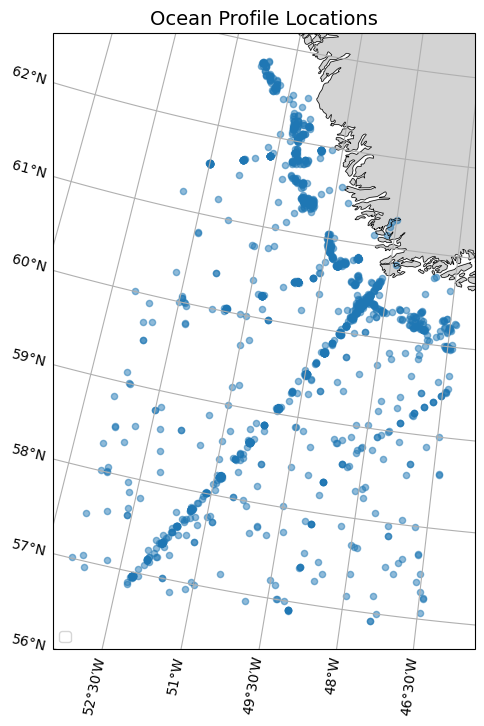

In [7]:
# define projection
proj = ccrs.NorthPolarStereo(central_longitude=-40)

# create figure and axis
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=proj)

# Beaufort Sea extent [lon_min, lon_max, lat_min, lat_max]
# ax.set_extent([-157, -125, 67, 75.5], crs=ccrs.PlateCarree())

# add map features
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.2)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False

# plot CTD profile locations

ax.scatter(
    ctd_ds.lon,
    ctd_ds.lat,
    s=20,
    color='tab:blue',
    # edgecolor='white',
    transform=ccrs.PlateCarree(), alpha=0.5
)

# add legend and title
ax.legend(loc='lower left',ncol=2)
ax.set_title('Ocean Profile Locations', fontsize=14)

plt.show()

In [9]:
# make time a dim
# ctd_time_ds = ctd_ds.swap_dims({"casts":"time"})
ctd_time_ds = osd_ds.swap_dims({"casts":"time"})

In [44]:
ctd_time_ds

<xarray.Dataset> Size: 36kB
Dimensions:  (time: 1789)
Coordinates:
  * time     (time) datetime64[ns] 14kB 1990-06-10T09:11:15.000000512 ... 202...
Data variables:
    lat      (time) float32 7kB dask.array<chunksize=(1789,), meta=np.ndarray>
    lon      (time) float32 7kB dask.array<chunksize=(1789,), meta=np.ndarray>
    cast     (time) int32 7kB dask.array<chunksize=(1789,), meta=np.ndarray>

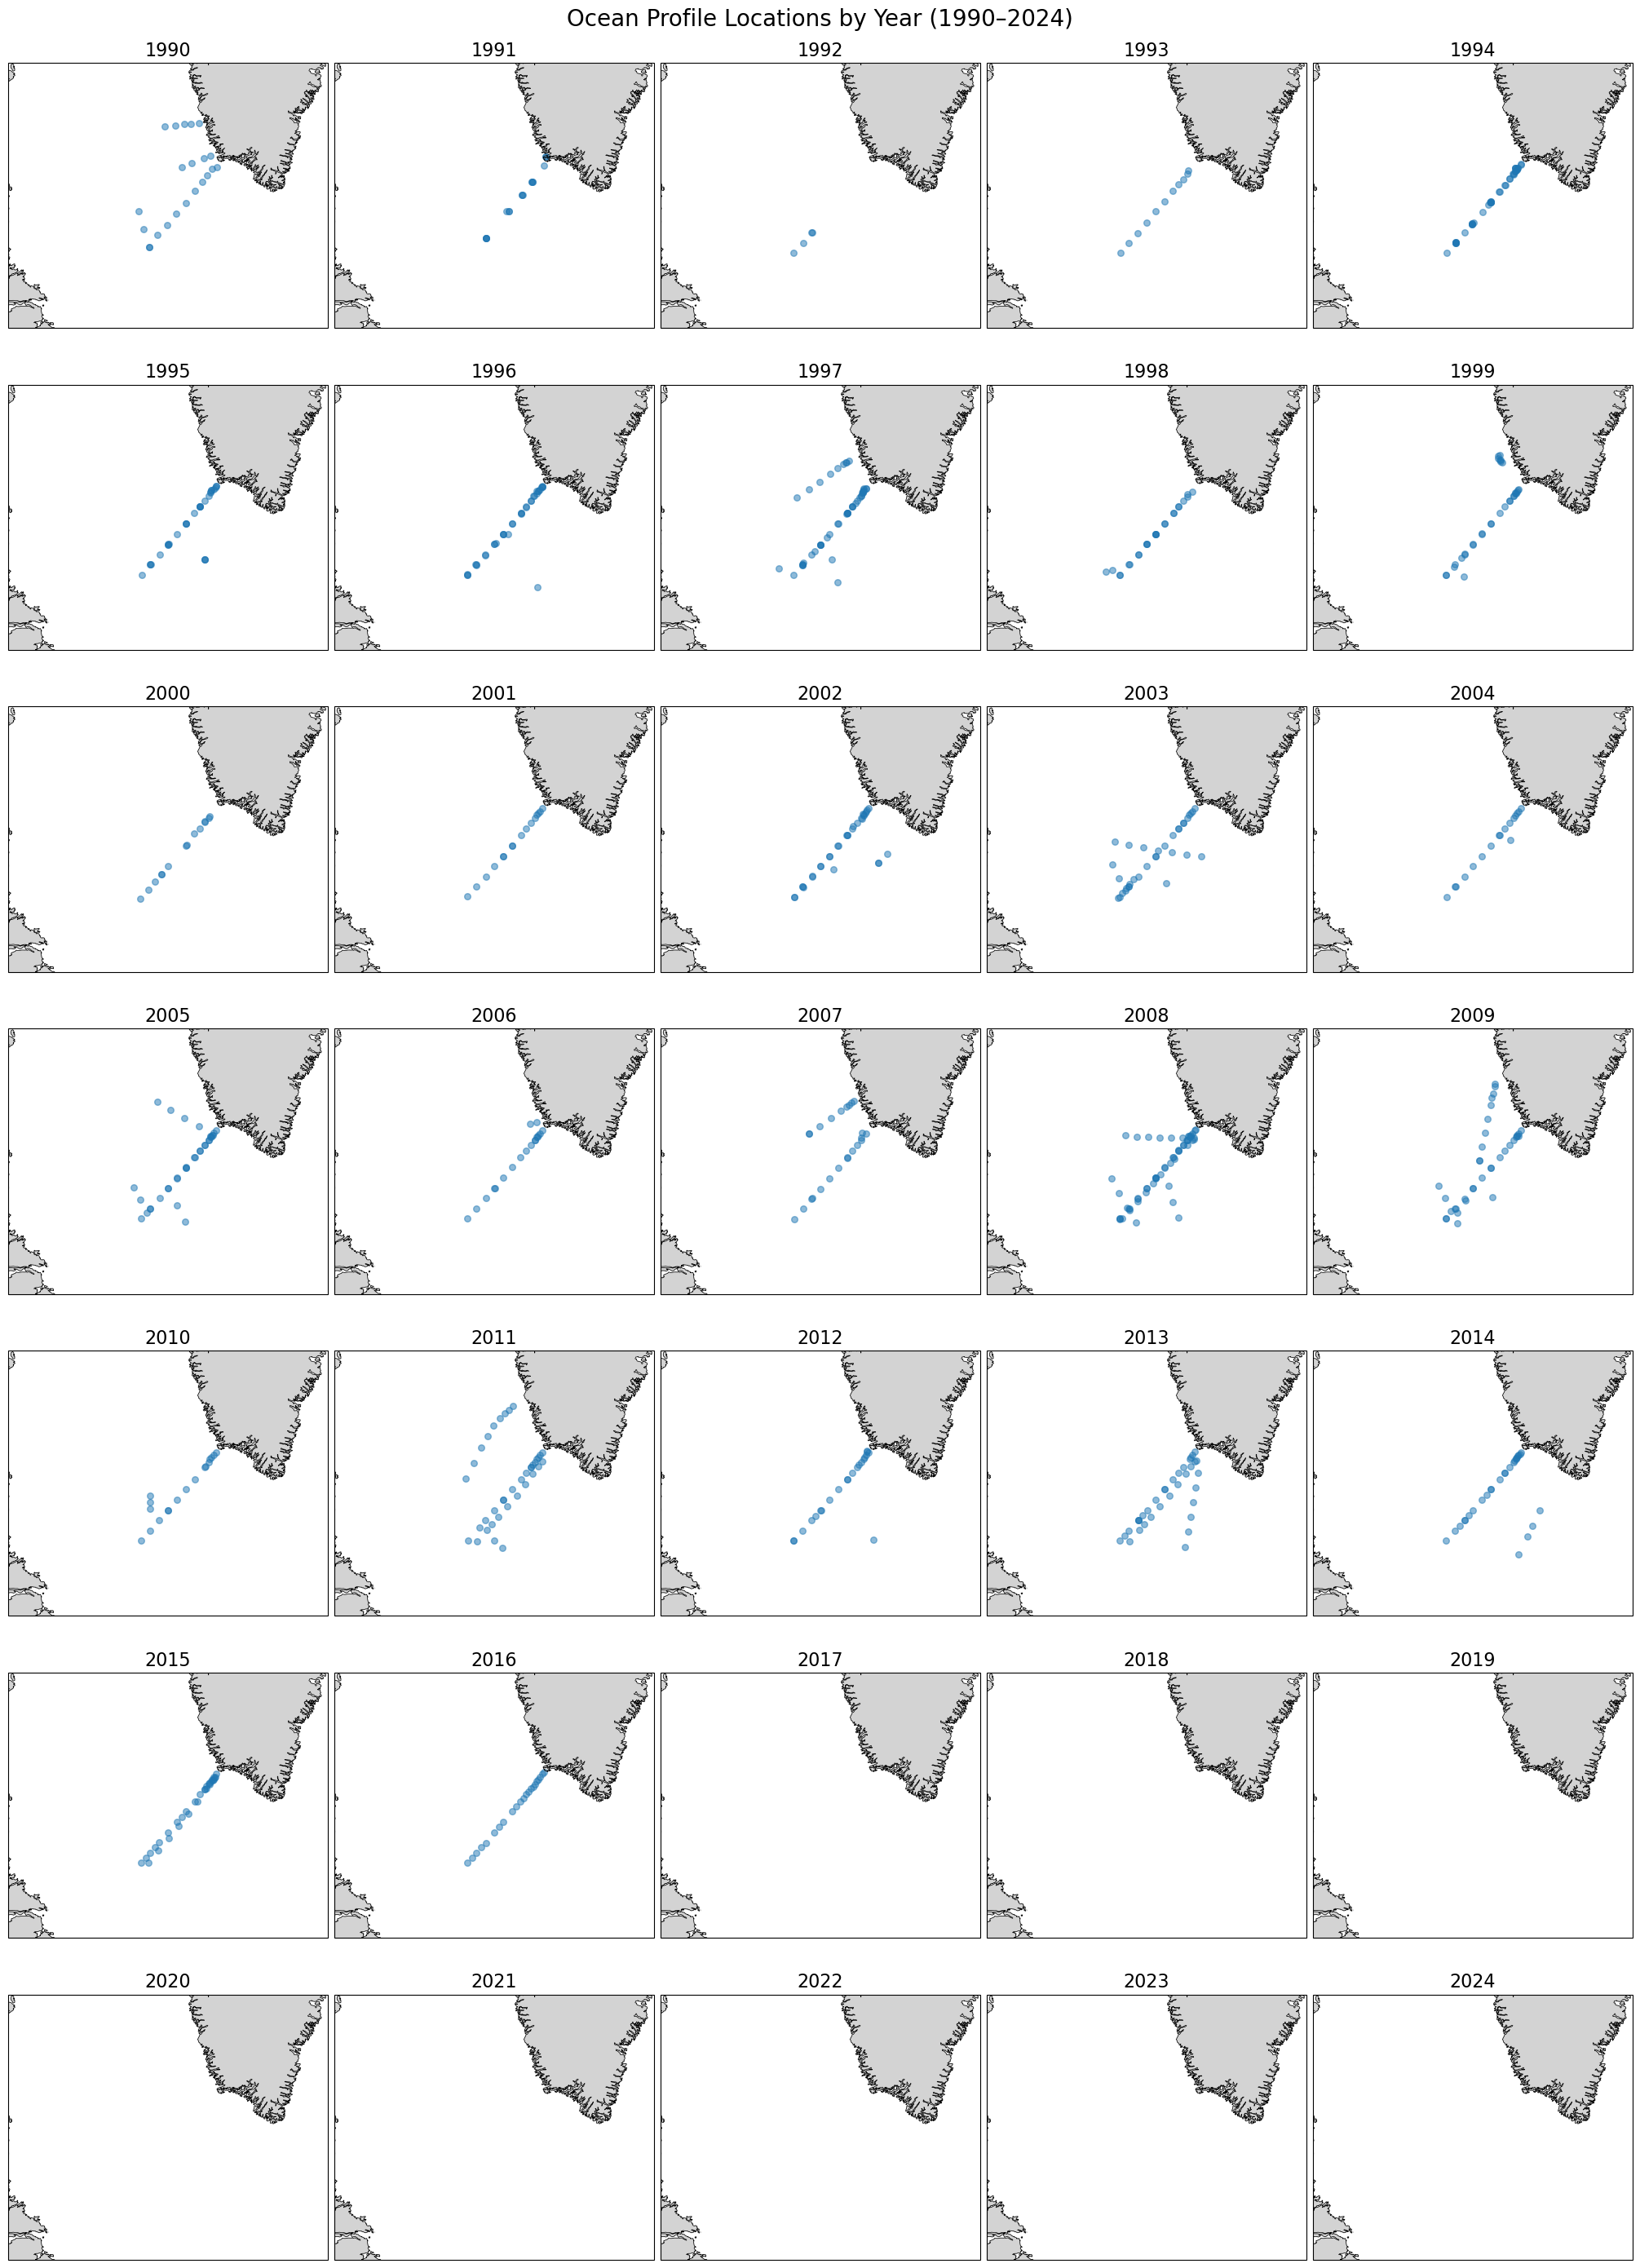

In [11]:
plt.rcParams['font.size'] = 14

# Years to plot
years = np.arange(1990, 2025)

# Projection
proj = ccrs.NorthPolarStereo(central_longitude=-40)

# Subplot layout
ncols = 5
nrows = int(np.ceil(len(years) / ncols))

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(4 * ncols, 4 * nrows),
    subplot_kw={"projection": proj},
    constrained_layout=True
)

axes = axes.flatten()

for ax, year in zip(axes, years):

    # Map features
    ax.add_feature(cfeature.LAND, color="lightgray")
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.2)

    # map extent
    ax.set_extent([-60, -40, 55, 63], crs=ccrs.PlateCarree())

    # ---- xarray year selection ----
    ds_year = ctd_time_ds.sel(
        time=ctd_time_ds.time.dt.year == year
    )

    # Plot if data exists for this year
    if ds_year.time.size > 0:
        ax.scatter(
            ds_year.lon.values,
            ds_year.lat.values,
            s=30,
            color="tab:blue",
            alpha=0.5,
            transform=ccrs.PlateCarree()
        )

    ax.set_title(str(year), fontsize=16)

# Hide unused axes
for ax in axes[len(years):]:
    ax.set_visible(False)

fig.suptitle("Ocean Profile Locations by Year (1990–2024)", fontsize=20)

# fig.savefig("AR7W_profiles_by_year.pdf",format="pdf",bbox_inches="tight",dpi=300)
# fig.savefig("AR7W_profiles_by_year.png",bbox_inches="tight",dpi=300)

plt.show()

### Surveys were skipped in 2017 and 2021

In [17]:
osd_ds = osd_ds.swap_dims({"casts":"time"})

In [23]:
osd_2016 = osd_ds.sel(time='2016')
osd_2016_tmp = osd_2016.isel(time=0)

In [35]:
osd_2016_tmp.cast.values

array(21953991, dtype=int32)

In [37]:
tmp = xr.open_dataset('/Users/mzahn/data/Labrador_AR7W/ocldb1769457252.646961.OSD/wod_021953991O.nc')

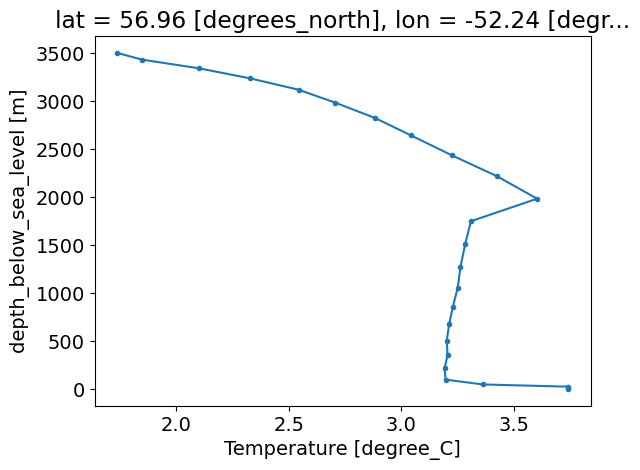

In [49]:
tmp.Temperature.plot(y='z',marker='.')

## Plot WOCE data

In [78]:
tmp1 = xr.open_dataset('/Users/mzahn/data/Labrador_AR7W/cchdo_search_results/14_18HU96006_1_ctd.nc')
tmp2 = xr.open_dataset('/Users/mzahn/data/Labrador_AR7W/cchdo_search_results/2_18DA90012_1_ctd.nc')

In [108]:
tmp1

<xarray.Dataset> Size: 5MB
Dimensions:             (N_PROF: 45, N_LEVELS: 1803)
Coordinates:
    expocode            (N_PROF) object 360B ...
    station             (N_PROF) object 360B '1' '2' '3' '4' ... '47' '48' '49'
    cast                (N_PROF) int32 180B ...
    sample              (N_PROF, N_LEVELS) object 649kB ...
    time                (N_PROF) datetime64[ns] 360B 1996-05-12T20:02:00 ... ...
    latitude            (N_PROF) float64 360B 44.69 44.4 44.28 ... 60.45 60.54
    longitude           (N_PROF) float64 360B ...
    pressure            (N_PROF, N_LEVELS) float64 649kB ...
Dimensions without coordinates: N_PROF, N_LEVELS
Data variables:
    section_id          (N_PROF) object 360B ...
    btm_depth           (N_PROF) float64 360B ...
    pressure_qc         (N_PROF, N_LEVELS) float32 325kB ...
    ctd_temperature     (N_PROF, N_LEVELS) float64 649kB ...
    ctd_temperature_qc  (N_PROF, N_LEVELS) float32 325kB ...
    ctd_salinity        (N_PROF, N_LEVELS) float64 649kB ...
    ctd_salinity_qc     (N_PROF, N_LEVELS) float32 325kB ...
    ctd_oxygen          (N_PROF, N_LEVELS) float64 649kB ...
    ctd_oxygen_qc       (N_PROF, N_LEVELS) float32 325kB ...
    profile_type        (N_PROF) object 360B ...
    geometry_container  float64 8B ...
Attributes:
    Conventions:               CF-1.8 CCHDO-1.0
    cchdo_software_version:    hydro 1.0.2.12
    cchdo_parameters_version:  params 2025.1.0
    comments:                  CTD,20250127CCHSIOENA\nRemoved upcast samples ...
    featureType:               profile

In [88]:
tmp1.latitude.values

array([44.6902, 44.4002, 44.2753, 43.8813, 43.4853, 43.1843, 42.8605,
       42.544 , 43.4658, 44.475 , 44.1335, 43.7812, 44.4278, 44.6822,
       44.887 , 45.2168, 53.6648, 53.7902, 53.9863, 54.217 , 54.4878,
       54.7498, 54.9248, 55.1007, 55.2608, 55.4188, 55.6093, 55.847 ,
       56.1238, 56.536 , 56.7488, 56.956 , 57.3678, 57.7802, 58.2202,
       58.6332, 59.0617, 59.4733, 59.7505, 59.981 , 60.1767, 60.29  ,
       60.3638, 60.4505, 60.5363])

In [90]:
tmp2.latitude.values

array([55.2478, 55.7503, 56.1998, 56.6983, 57.2167, 57.7995, 58.3668,
       58.9295, 59.5005, 60.4697, 60.3882, 60.1352, 59.8502, 59.4847,
       59.033 , 58.586 , 58.1322, 57.6852, 57.2173, 56.7992, 56.3672,
       55.917 , 55.5667, 55.283 , 55.0833, 54.8827, 54.6078, 54.3175,
       54.0513, 53.7668, 53.5273])

/tmp/ipykernel_99700/3374605986.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='lower left',ncol=2)


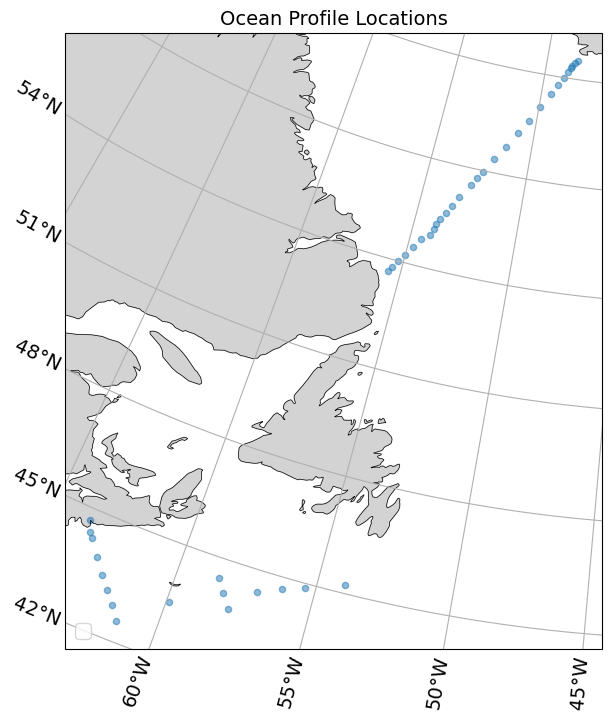

In [72]:
# define projection
proj = ccrs.NorthPolarStereo(central_longitude=-40)

# create figure and axis
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=proj)

# Beaufort Sea extent [lon_min, lon_max, lat_min, lat_max]
# ax.set_extent([-157, -125, 67, 75.5], crs=ccrs.PlateCarree())

# add map features
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.2)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False

# plot CTD profile locations

ax.scatter(
    tmp.longitude,
    tmp.latitude,
    s=20,
    color='tab:blue',
    # edgecolor='white',
    transform=ccrs.PlateCarree(), alpha=0.5
)

# add legend and title
ax.legend(loc='lower left',ncol=2)
ax.set_title('Ocean Profile Locations', fontsize=14)

plt.show()

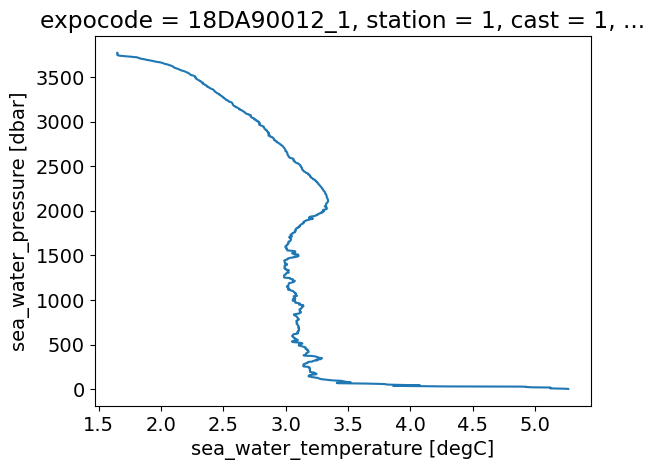

In [104]:
tmp2.isel(N_PROF=0).ctd_temperature.plot(y='pressure')